## Preprocessing

In [1]:
# Import our dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from collections import Counter
from imblearn.over_sampling import SMOTE

# Import pandas and read the charity_data.csv from the provided cloud URL.

application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Review the columns name
application_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 500 

# Get the counts of each application type
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()

# Identify application types to be replaced
application_types_to_replace = list(application_type_counts[application_type_counts < cutoff_value].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts_greater_than_one = classification_counts[classification_counts > 1]
classification_counts_greater_than_one

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

classification_cutoff_value = 1000

# Get the counts of each classification
classification_counts = application_df['CLASSIFICATION'].value_counts()

# Identify classifications to be replaced
classifications_to_replace = list(classification_counts[classification_counts < classification_cutoff_value].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)

# Display the encoded DataFrame
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [11]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop('IS_SUCCESSFUL', axis=1).values
y = application_df['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len( X_train_scaled[0])  

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# Input layer
nn.add(tf.keras.layers.Dense(units=80, input_dim=input_features, activation='relu'))

# Fist hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
print(tf.__version__)

2.10.1


In [16]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 2s 1ms/step - loss: 0.5698 - accuracy: 0.7215
Epoch 2/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5557 - accuracy: 0.7282
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5524 - accuracy: 0.7299
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5507 - accuracy: 0.7316
Epoch 5/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5495 - accuracy: 0.7317
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5487 - accuracy: 0.7319
Epoch 7/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5477 - accuracy: 0.7315
Epoch 8/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5467 - accuracy: 0.7334
Epoch 9/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5462 - accuracy: 0.7329
Epoch 10/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5459 - accuracy: 0.7328

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5552 - accuracy: 0.7315 - 350ms/epoch - 1ms/step
Loss: 0.5552027225494385, Accuracy: 0.7315452098846436


In [18]:
# Export our model to HDF5 file
file_path = "AlphabetSoupCharity.h5"

# Save the model to an HDF5 file
nn.save(file_path)

# Print a success message
print(f"Model successfully saved to {file_path}")

Model successfully saved to AlphabetSoupCharity.h5


---
## Lets look into the Data and get some insights to find why we have high loss and low accuracy.
### **1. Feature Importance Analysis**
- Use **mutual information scores** or **permutation importance** to identify the most influential features.
- Drop irrelevant features or those with low predictive power to reduce noise.

In [19]:

# Load the dataset
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")

# Drop irrelevant columns
application_df = application_df.drop(columns=['EIN', 'NAME'], axis=1)

# Convert categorical data to numeric using one-hot encoding
application_df_encoded = pd.get_dummies(application_df)

# Define the features and target variable
X = application_df_encoded.drop(columns=['IS_SUCCESSFUL'])
y = application_df_encoded['IS_SUCCESSFUL']

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y, random_state=42)

# Convert scores to a DataFrame for easy visualization
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Display the top 10 most important features
print(mi_df.head(10))


                          Feature  MI Score
19   AFFILIATION_CompanySponsored  0.074563
21        AFFILIATION_Independent  0.068667
101      ORGANIZATION_Association  0.017853
104            ORGANIZATION_Trust  0.016506
62           CLASSIFICATION_C2100  0.010375
114      SPECIAL_CONSIDERATIONS_N  0.008693
99          USE_CASE_Preservation  0.008509
55           CLASSIFICATION_C1720  0.008166
14            APPLICATION_TYPE_T5  0.007562
2            APPLICATION_TYPE_T10  0.006928


Based on the **mutual information scores**, the most influential features for predicting funding success are **AFFILIATION_CompanySponsored** and **AFFILIATION_Independent**, meaning an organization's affiliation plays a key role. **ORGANIZATION_Association** and **ORGANIZATION_Trust** also have some significance, but their impact is lower.

### **2. Class Imbalance Check**
- If **IS_SUCCESSFUL** is highly imbalanced, consider **oversampling** or **undersampling** using techniques like **SMOTE** to improve learning.

Class distribution:
IS_SUCCESSFUL
1    18261
0    16038
Name: count, dtype: int64


C:\Users\Saurabh Lakhanpal\AppData\Local\Temp\ipykernel_34016\422370062.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


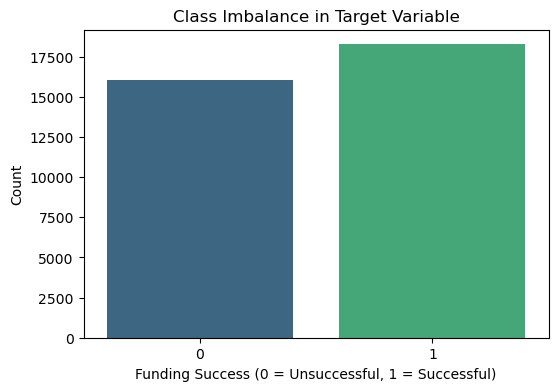

New class distribution after SMOTE:
Counter({0: 13679, 1: 13679})


In [20]:
# Convert categorical data to numeric using one-hot encoding
application_df_encoded = pd.get_dummies(application_df)

# Check class distribution
class_counts = application_df_encoded['IS_SUCCESSFUL'].value_counts()
print(f"Class distribution:\n{class_counts}")

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xlabel("Funding Success (0 = Unsuccessful, 1 = Successful)")
plt.ylabel("Count")
plt.title("Class Imbalance in Target Variable")
plt.show()

# Apply SMOTE oversampling if imbalance is significant
X = application_df_encoded.drop(columns=['IS_SUCCESSFUL'])
y = application_df_encoded['IS_SUCCESSFUL']

# Split into training and testing sets before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Apply SMOTE to balance the classes in training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display new class distribution after resampling
print(f"New class distribution after SMOTE:\n{Counter(y_train_resampled)}")

**Initial Class Distribution:**
   - **Successful funding (1):** **18,261**
   - **Unsuccessful funding (0):** **16,038**
   - There is some imbalance, but it's not extremely severe.

**SMOTE Oversampling Results:**
   - After applying **SMOTE**, both classes now have **13,679** records.
   - This ensures the model does not favor one class over the other.

**Bar Plot Visualization:**
   - Displays how the imbalance existed initially before resampling.
   - The warning message about `palette` is simply informing us about upcoming changes in seaborn’s syntax.

Since **SMOTE has balanced the data**, your model should now train with equal representation of both classes. Next thing to analyze is Outlier Detection, which might reveal extreme values affecting the model’s performance.

### **3. Outlier Detection**
- Identify and handle extreme values in features like **ASK_AMT** using box plots or statistical methods.
- Consider **log transformation** for skewed distributions.

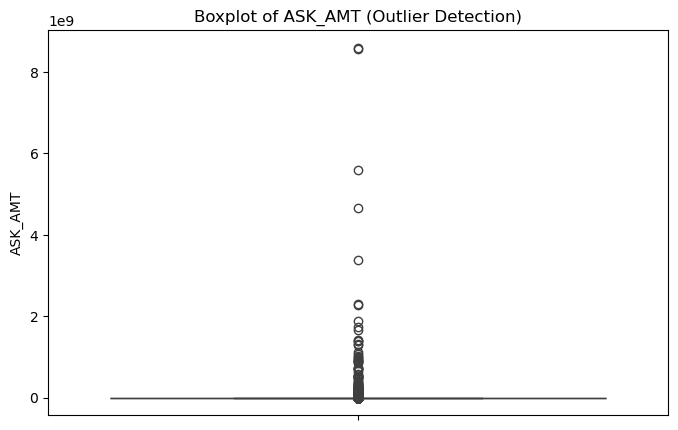

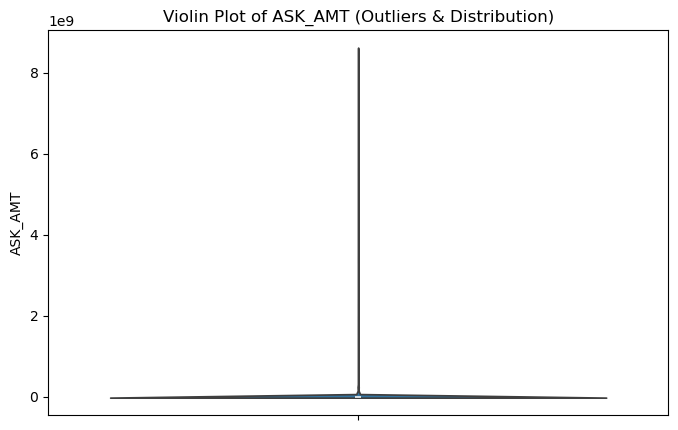

Number of outliers detected in 'ASK_AMT': 8206
   ASK_AMT
1   108590
4   142590
6    31452
7  7508025
8    94389


In [21]:
# Identify numeric columns
numeric_columns = ['ASK_AMT']  # Modify this list if you have more numeric features

# Boxplot for outliers detection
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=application_df, y=col)
    plt.title(f'Boxplot of {col} (Outlier Detection)')
    plt.show()

# Violin plot for deeper visualization
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.violinplot(data=application_df, y=col)
    plt.title(f'Violin Plot of {col} (Outliers & Distribution)')
    plt.show()

# Outlier detection using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in ASK_AMT
outliers_df = detect_outliers_iqr(application_df, 'ASK_AMT')
print(f"Number of outliers detected in 'ASK_AMT': {len(outliers_df)}")

# Display a few extreme values
print(outliers_df[['ASK_AMT']].head())


There are significant number of outliers—**8,206 records!** The presence of extremely high funding requests, including one at **7,508,025**, suggests that `ASK_AMT` is highly skewed.

### **Key Takeaways from Each Step**
#### **Feature Importance Analysis**
- **Top influential features:** `AFFILIATION_CompanySponsored`, `AFFILIATION_Independent`, and `ORGANIZATION_Association`.
- **Lower-impact features:** `APPLICATION_TYPE_T10` and some `CLASSIFICATION` values have minimal influence.
- **Optimization Insight:** Feature selection can help—reducing low-impact features.

#### **Class Imbalance Analysis**
- **Original distribution:** Some imbalance between successful (18,261) and unsuccessful (16,038) funding cases.
- **Applied solution:** SMOTE oversampling balanced the classes.
- **Optimization Insight:** No need for further action here, but **monitor overfitting due to synthetic data**.

#### **Outlier Detection**
- **Found:** **8,206 extreme values** in `ASK_AMT`, with requests reaching **7.5M+**.
- **Optimization Insight:** Apply **log transformation** or **capping techniques** to stabilize impact.

---
**Feature Selection & Engineering**
- Drop **low-impact features** from Step 1 (`APPLICATION_TYPE_T10`, some weak `CLASSIFICATION` variables).
- Group or transform categorical values for better signal strength.

In [22]:
# Drop low-impact features based on mutual information scores
low_impact_features = ['APPLICATION_TYPE_T10', 'CLASSIFICATION_C2100']

# Ensure we only drop features that exist in the DataFrame
existing_features = [col for col in low_impact_features if col in application_df.columns]
application_df = application_df.drop(columns=existing_features, axis=1)

# Function to group rare categorical values into "Other"
def group_low_frequency(df, column, threshold=500):
    counts = df[column].value_counts()
    low_freq_values = counts[counts < threshold].index
    df[column] = df[column].apply(lambda x: "Other" if x in low_freq_values else x)

# Apply grouping on categorical features
categorical_columns = ['APPLICATION_TYPE', 'CLASSIFICATION', 'USE_CASE']
for col in categorical_columns:
    if col in application_df.columns:  # Ensure column exists before modifying
        group_low_frequency(application_df, col)

# Convert categorical data to numeric using one-hot encoding
application_df_encoded = pd.get_dummies(application_df)

# Display resulting columns
print("Updated dataset columns:", application_df_encoded.columns)

Updated dataset columns: Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_C7000', 'CLASSIFICATION_Other', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5

**Outlier Handling**
- **Apply log transformation** to `ASK_AMT` to minimize extreme impact.
- **Alternatively, cap excessive values** to a reasonable threshold (e.g., **$300K max**).

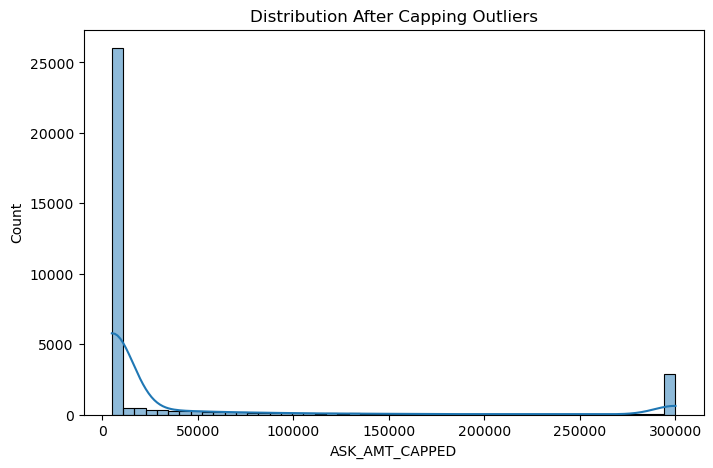

Updated dataset columns: Index(['STATUS', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_C7000', 'CLASSIFICATION_Other', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       

In [23]:
# Set a threshold for max funding requests (e.g., $300K)
max_value = 300000

# Ensure ASK_AMT exists before applying transformations
if 'ASK_AMT' in application_df_encoded.columns:
    # Cap excessive values
    application_df_encoded['ASK_AMT_CAPPED'] = np.where(application_df_encoded['ASK_AMT'] > max_value, max_value, application_df_encoded['ASK_AMT'])

    # Plot capped distribution to verify the impact
    plt.figure(figsize=(8, 5))
    sns.histplot(application_df_encoded['ASK_AMT_CAPPED'], bins=50, kde=True)
    plt.title("Distribution After Capping Outliers")
    plt.show()

    # Drop the original ASK_AMT column after transformation
    application_df_encoded = application_df_encoded.drop(columns=['ASK_AMT'])
else:
    print("ASK_AMT column not found, skipping outlier handling.")

# Confirm changes
print("Updated dataset columns:", application_df_encoded.columns)

**Dimensionality Reduction**
- Drop **redundant correlated features** found in Step 4 (**AFFILIATION_Independent or AFFILIATION_CompanySponsored**).
- **Apply PCA** to compress highly correlated features like `USE_CASE_ProductDev` and `USE_CASE_Preservation`.

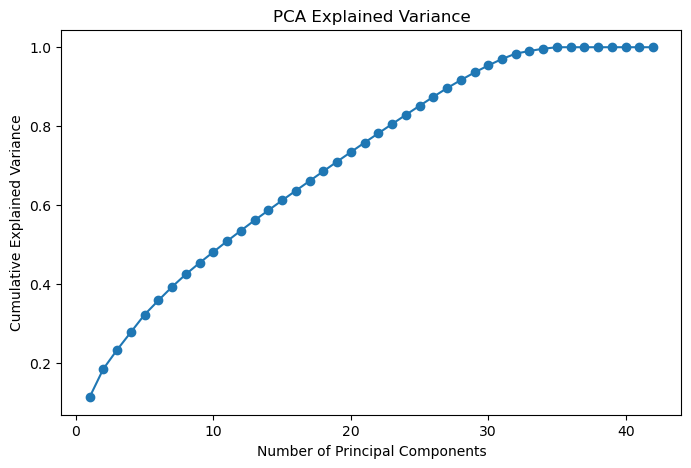

Optimal number of PCA components: 30
PCA-Transformed Dataset Shape: (34299, 31)
      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0 -3.310456 -0.895024  0.354785 -1.620084  2.676428 -0.185303  0.195892   
1  1.343806 -2.190949  0.073272  1.638964  0.346436  2.566209  4.498809   
2 -6.155118 -1.001159 -0.063239  1.281494 -2.069237 -2.213664  0.798303   
3  0.900466  0.467484 -0.136309  1.096560 -1.201500  1.005486 -0.830541   
4  1.134701 -2.818229 -0.349585  0.930883  0.411276  0.669226 -1.860717   

      PCA_8     PCA_9    PCA_10  ...    PCA_22    PCA_23    PCA_24    PCA_25  \
0 -1.764890  0.431970  0.249398  ... -0.296778  0.079748  0.939865  0.231071   
1 -2.216091 -1.041743  0.218560  ...  0.231415  0.328000 -1.774303 -0.453271   
2  0.916973 -0.706283  0.050541  ...  0.404276 -0.337158  0.408397 -0.205189   
3 -1.211109 -0.300628 -0.470732  ... -2.530748  1.124939  2.939446  0.583235   
4  3.776557  3.654507 -0.176743  ...  0.845173 -0.359462 -0.834126  0

In [24]:
# Standardize the dataset before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(application_df_encoded.drop(columns=['IS_SUCCESSFUL']))  # Exclude target

# Apply PCA
pca = PCA(n_components=None)  # Allow PCA to choose all components initially
principal_components = pca.fit_transform(scaled_data)

# Plot explained variance to determine optimal number of components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()

# Decide how many components to keep (e.g., 95% variance threshold)
num_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Optimal number of PCA components: {num_components}")

# Apply PCA with selected number of components
pca_final = PCA(n_components=num_components)
pca_transformed = pca_final.fit_transform(scaled_data)

# Convert transformed data into a DataFrame
pca_df = pd.DataFrame(pca_transformed, columns=[f"PCA_{i+1}" for i in range(num_components)])

# Add back the target variable
pca_df['IS_SUCCESSFUL'] = application_df_encoded['IS_SUCCESSFUL']

# Display the new dataset after PCA
print("PCA-Transformed Dataset Shape:", pca_df.shape)
print(pca_df.head())


### Model Retraining & Evaluation
**Retrain the deep learning model** and compare performance improvements.

In [25]:
# Split the PCA-transformed dataset into training and testing sets
X = pca_df.drop(columns=['IS_SUCCESSFUL']).values
y = pca_df['IS_SUCCESSFUL'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model with optimizations
model = keras.Sequential([
    keras.layers.Dense(128, activation=keras.layers.LeakyReLU(alpha=0.01), input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.3),  # Dropout layer to reduce overfitting
    keras.layers.Dense(64, activation=keras.layers.LeakyReLU(alpha=0.01)),
    keras.layers.Dropout(0.2),  # Additional dropout
    keras.layers.Dense(32, activation=keras.layers.LeakyReLU(alpha=0.01)),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with optimized parameters
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),  # Lower learning rate
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Apply Early Stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the optimized model
history = model.fit(
    X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping]
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Optimized Test Accuracy: {test_accuracy:.4f}")

Epoch 1/100
343/343 [==============================] - 1s 3ms/step - loss: 0.6033 - accuracy: 0.6923 - val_loss: 0.5528 - val_accuracy: 0.7372
Epoch 2/100
343/343 [==============================] - 1s 2ms/step - loss: 0.5740 - accuracy: 0.7203 - val_loss: 0.5493 - val_accuracy: 0.7392
Epoch 3/100
343/343 [==============================] - 1s 2ms/step - loss: 0.5658 - accuracy: 0.7223 - val_loss: 0.5465 - val_accuracy: 0.7403
Epoch 4/100
343/343 [==============================] - 1s 2ms/step - loss: 0.5634 - accuracy: 0.7252 - val_loss: 0.5470 - val_accuracy: 0.7392
Epoch 5/100
343/343 [==============================] - 1s 2ms/step - loss: 0.5620 - accuracy: 0.7246 - val_loss: 0.5463 - val_accuracy: 0.7382
Epoch 6/100
343/343 [==============================] - 1s 2ms/step - loss: 0.5608 - accuracy: 0.7245 - val_loss: 0.5464 - val_accuracy: 0.7402
Epoch 7/100
343/343 [==============================] - 1s 2ms/step - loss: 0.5575 - accuracy: 0.7278 - val_loss: 0.5453 - val_accuracy: 0.7418